# Introduction

This worksheet focuses on Neural Networks. You will:

- Implement your own version of a Single Layer Perceptron (SLP) to understand the underlying mechanics, and compare it with an equivalent implementation built using `PyTorch`.

- Build and train Multi‑Layer Perceptrons (MLPs) in `PyTorch` for both classification and regression tasks, exploring how to design, configure, and optimise these neural network models.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a function %matplotlib inline to display plots in the worksheet.

In [1]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt

# 1. Single Layer Perceptron
In this question, you will build and train a single‑layer perceptron using PyTorch to make predictions on the breast cancer dataset.
This is a binary classification task where the goal is to classify each instance as malignant or benign based on 30 numerical features extracted from medical images.

In this question, you will:

(a) Load the breast cancer dataset from  `sklearn` and store the features and targets in suitable variables.\
(b) Separate your data into a training and test split.\
(c) (Optional) Write your own function to implement Single Layer Perceptron.\
(d) Implement Single Layer Perceptron in `PyTorch` (e.g., a single `nn.Linear` layer with a `sigmoid` output).\
    Train your PyTorch perceptron on the training data using an appropriate loss function and an optimizer.\
(e) Evaluate the performance of both models on the test data using appropriate metrics (e.g., accuracy, precision).     
(f) Plot the confusion matrix to visualise the performance of your model.

## Part (a)  
Import the package `datasets` from `sklearn` and then load the load_breast_cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`.  
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).  
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?  

In [2]:
#TODO: import suitable packages, load the dataset, and save data and targets into variables X and Y
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
X.shape
#Y #classification labels

(569, 30)

## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [3]:
# TODO: import the package train_test_split from sklearn.model_selection.
from sklearn.model_selection import train_test_split
# Split the dataset into Xtr, Xtest, Ytr, Ytest
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

Perceptrons are very sensitive to feature scale. Standardise your input data by applying `StandardScaler` from `sklearn.preprocessing` to both the training set (`Xtr`) and the test set (`Xtest`).

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #均值为0，标准差为1（标准化）
Xtr = scaler.fit_transform(Xtr)
Xtest = scaler.transform(Xtest)

## (Optional) Part (c)  
Recall from the lecture that a single-layer perceptron runs as follows:  

**Training step**:  
- For each training datapoint $(\vec{x}_i)$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x}_i + b)$.  
  - Pass $(z)$ through the activation function (sigmoid function in this case) to get the predicted class $(y_{\text{pred}})$.  
  - Compute the error as $(e = y_i - y_{\text{pred}})$, where $(y_i)$ is the true label.  
  - Update the weights and bias using the perceptron learning rule:  
    $[
    \vec{w} \gets \vec{w} + \eta \cdot e \cdot \vec{x}_i  
    ]  
    [
    b \gets b + \eta \cdot e
    ]$  
  Here, $(\eta)$ is the learning rate.  

**Prediction step**:  
- For a given datapoint $(\vec{x})$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x} + b)$.  
  - Pass $(z)$ through the step function to obtain the class prediction.  

Write function(s) to implement the training and prediction steps. Y

class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, iterat):
        #TODO# initialise the weights to random values and set the bias to 0
        self.weights = ##TODO## (HINT: use np.random.rand())
        self.bias = ##TODO## 
        self.learning_rate = learning_rate
        self.iterat = iterat

    def activation(self, z):
        #TO DO # Write a function to implement the **sigmoid activation function**. 
        return ##TODO## 
   
    def train(self, X, y):
        for epoch in range(self.iterat):
            for i in range(X.shape[0]):
                # Calculate the linear combination
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)

                #TODO# Calculate error between target and predicted values
                error = ##TODO## 
                
                #TODO# update the weights and bias according to the above equations
                self.weights += ##TODO##
                self.bias += ##TODO##

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
#Train the perceptron
input_size = Xtr.shape[1] # To pass the number of features
perceptron1 = SingleLayerPerceptron(input_size=input_size, learning_rate=0.01, iterat=10)

##TODO##  #Train the perceptron with the Train data
perceptron1.train(Xtr, Ytr)

#Test the perceptron
my_y_pred_prob = ##TODO##
my_Ypred = (my_y_pred_prob >= 0.5).astype(int).flatten()

## Part (d) Perceptron in PyTorch
In this step, you will build a simple neural network model that implements a single‑layer perceptron in PyTorch. A perceptron consists of one fully‑connected (linear) layer that computes a weighted sum of the inputs, followed by an activation function that maps this value to a predicted class. For binary classification, we apply a sigmoid activation, which converts the linear output into a probability between 0 and 1.

### Fully-connected layer
A fully‑connected layer connects every input feature to every output unit. In PyTorch, this is implemented using the `nn.Linear` class, which performs the linear transformation  $(z = \vec{w} \cdot \vec{x}_i + b)$ before the activation function is applied.

Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

### Activation Functions
PyTorch does not include activation functions inside `nn.Linear`, so they must be added explicitly. For a perceptron used in binary classification, we apply `torch.sigmoid()` to the output of the linear layer. This produces a probability that can be thresholded to obtain a class label.

Forward Pass
In PyTorch, the `forward()` method defines how data flows through the model. Inputs are passed through the linear layer, then through the activation function, and the final output is returned. This computation graph determines how gradients are calculated during training.

Let's import necessary libraries

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

In [6]:
class PerceptronTorch(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1) # 等价于z = w*x + b, input_dim是输入特征数量，
                                              # 输出维度（输出神经元个数）为1，正类的“得分 / 概率”
                                              # 感知机最终会将所有输入特征“加权求和”压缩成一个数值。

    def forward(self, x): # 这一步定义了数据进入模型后是如何被加工的。计算过程遵循以下数学公式：y = \sigma(W \cdot x + b)
        return torch.sigmoid(self.linear(x)) # sigmoid把实数映射到 (0, 1)
        

After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use binary cross‑entropy loss, which is the standard loss function for binary classification tasks such as logistic regression. The module `nn.BCELoss()` expects the model to output probabilities (after a sigmoid), so we do not need to implement any additional activation inside the loss function.

Binary cross entropy Loss: https://docs.pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a smaller number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

The cell below defines a training function for our classifier. 

In [7]:
model = PerceptronTorch(input_dim=Xtr.shape[1]) #设定输入维度为数据集列数（即特征数量）
optimizer = optim.Adam(model.parameters(), lr=0.01) #Adam 是目前深度学习中最流行的优化算法之一。它非常聪明，能自动调整学习率。
'''
model.parameters(): 这一步是告诉优化器：“你要负责更新这个模型里的所有权重和偏置”。
lr=0.01 (Learning Rate): 学习率。它决定了模型在每次出错后，参数更新的“步子”有多大。
太大：模型可能会在最优解附近跳来跳去，无法收敛。
太小：训练速度极慢。
'''

criterion = nn.BCELoss()
'''
BCELoss (Binary Cross Entropy Loss): 二元交叉熵损失。
这是二分类问题的标准损失函数。
逻辑:它用来衡量模型输出的概率(0~1)与实际标签(0 或 1)之间的差距。
如果正确答案是 1,模型预测 0.9,损失就很小。
如果正确答案是 1,模型预测 0.1,损失就会非常大，从而“惩罚”模型。
'''

'\nBCELoss (Binary Cross Entropy Loss): 二元交叉熵损失。\n这是二分类问题的标准损失函数。\n逻辑:它用来衡量模型输出的概率(0~1)与实际标签(0 或 1)之间的差距。\n如果正确答案是 1,模型预测 0.9,损失就很小。\n如果正确答案是 1,模型预测 0.1,损失就会非常大，从而“惩罚”模型。\n'

We need to convert our data into PyTorch‑compatible tensors so the model can train on it. PyTorch cannot operate directly on NumPy arrays — it requires tensors, which are optimized for automatic differentiation and efficient computation on both CPUs and GPUs.

In [8]:
Xtr_t = torch.tensor(Xtr, dtype=torch.float32)
Ytr_t = torch.tensor(Ytr, dtype=torch.float32).view(-1, 1)

Xtest_t = torch.tensor(Xtest, dtype=torch.float32)

### Train the Perceptron 

This training loop does the following:

- Runs for a fixed number of epochs so the model repeatedly sees the training data.
- Performs a forward pass on the training set to compute predictions.
- Calculates the training loss and stores it for plotting.
- Backpropagates the error and updates the model’s weights using the optimizer.
- Evaluates the model on the test set (in eval mode and without gradients).
- Records the validation loss to track generalisation.

Plots both curves so you can compare training vs. validation loss over time.

**TO-DO:**  Train the network for 30 epochs and plot the losses by completing the cell below. At which epoch did we get the best model fit? How could we use the dev set losses to return the best model? Remember that neural networks tend to overfit if trained too long, as they have many parameters and are very flexible. 

Note that the answer can vary each time you run the training process due to random initialisation of the model weights and shuffling of the dataset. 

ANSWER
   * The plot shows the best fit around ... epochs before it starts to overfit, as the validation loss converges while training loss goes down 
   * If dev set loss stops going down for a long time, but training set loss keeps decreasing, the model may be overfitting.
   * We can stop training at the point where dev set loss stops decreasing 
   * Or we could save the model with best dev set performance and use that model to make predictions.

Epoch 1/30, Loss: 0.6012
Epoch 2/30, Loss: 0.5486
Epoch 3/30, Loss: 0.5027
Epoch 4/30, Loss: 0.4628
Epoch 5/30, Loss: 0.4280
Epoch 6/30, Loss: 0.3979
Epoch 7/30, Loss: 0.3716
Epoch 8/30, Loss: 0.3485
Epoch 9/30, Loss: 0.3282
Epoch 10/30, Loss: 0.3102
Epoch 11/30, Loss: 0.2941
Epoch 12/30, Loss: 0.2797
Epoch 13/30, Loss: 0.2667
Epoch 14/30, Loss: 0.2549
Epoch 15/30, Loss: 0.2442
Epoch 16/30, Loss: 0.2345
Epoch 17/30, Loss: 0.2256
Epoch 18/30, Loss: 0.2174
Epoch 19/30, Loss: 0.2100
Epoch 20/30, Loss: 0.2031
Epoch 21/30, Loss: 0.1968
Epoch 22/30, Loss: 0.1910
Epoch 23/30, Loss: 0.1857
Epoch 24/30, Loss: 0.1807
Epoch 25/30, Loss: 0.1762
Epoch 26/30, Loss: 0.1719
Epoch 27/30, Loss: 0.1680
Epoch 28/30, Loss: 0.1643
Epoch 29/30, Loss: 0.1609
Epoch 30/30, Loss: 0.1577


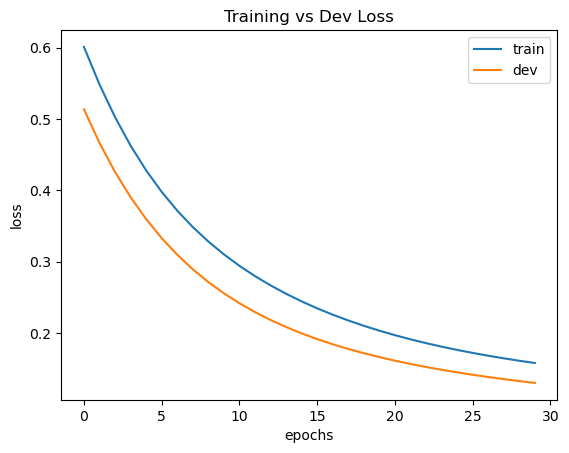

In [9]:
num_epochs=30
train_losses = []
dev_losses = [] #这两个空列表像“笔记本”一样，记录每一次迭代后的误差，以便后续画出损失曲线。

### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model.train() #告诉模型：“现在开始学习了”
    optimizer.zero_grad() # PyTorch 默认会累加梯度。在处理新一轮数据前，必须把上一轮的梯度清零，否则训练会乱套。
                          # 当你调用 loss.backward() 时，
                          # 计算出的梯度不会覆盖旧的梯度，
                          # 而是会**累加（Accumulate）**到现有的梯度上（即 grad = grad + new_grad）
                          # 无论你的模型是简单的单层感知机，还是拥有上千层的超级深度神经网络（如 GPT），在 PyTorch 的标准训练流程中，这一步都是必须的。

    # forward pass
    outputs = model(Xtr_t) #把数据喂给模型，得到当前的预测值
    loss = criterion(outputs, Ytr_t) #计算“预测值”与“真实标签”之间的差距，loss是包含了计算图信息的张量（Tensor）
    train_losses.append(loss.item()) #loss.item() 是一个纯数字(float)，记录当前的误差值。这个数值越小，说明模型的预测越接近真实标签。

    # backward + update
    loss.backward() # 计算出损失函数对模型中每一个权重（W 和 b）的导数（梯度Gradient）,告诉模型：“如果要减小误差，每个参数应该往哪个方向调整”。
                    # 计算出的梯度会被存储在每个参数对象的 .grad 属性中。
    optimizer.step() # 优化器（Adam）正式出手，根据刚才计算出的梯度，微微调整模型参数。这一步才是真正的修正
                     # 优化器（如 Adam 或 SGD）会读取刚才保存在 .grad 里的梯度值，并结合学习率（Learning Rate）来更新参数。
                     # 公式体现：W_{new} = W_{old} - learning_rate * gradient
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model.eval() #切换到“评估模式”，关闭学习相关的机制。
    with torch.no_grad(): #这是一个优化开关。告诉 PyTorch：“现在只是考试，不需要计算梯度，也不需要更新参数”。这样可以节省大量内存和计算资源。
        dev_out = model(Xtest_t)
        dev_loss = criterion(dev_out, torch.tensor(Ytest, dtype=torch.float32).view(-1,1))
        dev_losses.append(dev_loss.item()) #记录验证集损失，用来观察模型是否发生了过拟合
        '''
        评估(Validation/Dev Loss, 本代码块的部分):是为了在训练过程中监控模型在“未见过的数据”上的表现，防止过拟合。
            代码逻辑上,这一部分可以使用Xtest_t,因为你的模型在训练(optimizer.step())时并没有真正“读到”这些测试数据

        预测(Final Prediction, prediction部分的代码):是为了在训练完成后，看看模型最终的实战能力
            为了达到最严谨的科学标准，通常建议将数据分为三份:
                训练集(Train Set): 用于模型学习和参数调整。
                验证集(Validation/Dev Set): 用于在训练过程中评估模型性能，调整超参数，监控过拟合。
                测试集(Test Set): 用于在训练完全结束后，评估模型的最终性能，模拟真实世界的应用场景。
        '''

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

### Predict on Test Data
Now we can run the model in evaluation mode, generate predicted probabilities for the test set, and convert those probabilities into binary class labels by applying a 0.5 threshold.

In [10]:
# model.eval() # 先切换模式，严谨一些的写法

with torch.no_grad(): #再次进入“考试模式”，准备在测试集上评估模型性能
    y_pred_prob = model(Xtest_t) #获取原始概率输出（因为用了 Sigmoid 激活函数，所以y_pred_prob 是一个个0~1之间的数值张量）
    Y_pred = (y_pred_prob >= 0.5).float().numpy().flatten()

## Part (e) 
Use the built in metrics in sklearn to calculate the accuracy of both classifiers on the Testing set.

In [11]:
from sklearn.metrics import accuracy_score

##TODO## Write your answer here
#Evaluate the accuracy
accuracy = accuracy_score(Ytest, Y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9825


If the accuracy is low, consider increasing the maximum number of iterations and repeating the fitting and testing process.

## Part(f) 
Plot the confusion matrix to visualise the performance of your model.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


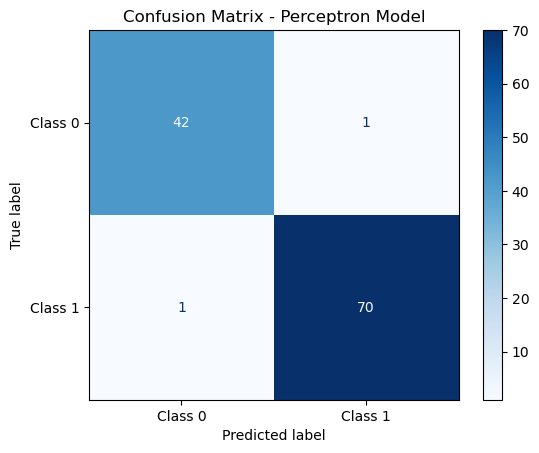

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
##TODO## Write your answer here
#Evaluate the precision, recall, and F1-score
print(classification_report(Ytest, Y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(Ytest, Y_pred) # 生成原始混淆矩阵数据
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Perceptron Model')
plt.show()

# 2. Multilayer Perceptron

<img src="https://raw.githubusercontent.com/ematm0067/2025_26/6e01ac01c1e0e85ad7e89176a16e8facc13a199a/worksheets/source/Picture1.png" width="600" />

The input layer, located on the far left, contains neurons that correspond to the input features. Each neuron in the hidden layer processes the values from the previous layer through a weighted sum, which is then passed through a non-linear activation function, such as `ReLU`. Finally, the output layer takes the values from the last hidden layer and converts them into the model’s output.

# 2.1. Multi‑class Classification using a Multilayer Perceptron
Now that you’ve compared your Perceptron implementation with the torch Perceptron for binary classification, you will extend your work to a multiclass classification task using the load_digits dataset.
This dataset contains 8×8 grayscale images of handwritten digits (0–9), represented as 64 numerical pixel‑intensity features.

In this task, you will implement a Multilayer Perceptron (MLP) using PyTorch.

(a) Load the dataset
Use `sklearn.datasets.load_digits()` to obtain the feature matrix and target labels.
Store them in appropriate variables.

(b) Split the data
Use train_test_split to divide the dataset into training and test sets.
Convert both splits into PyTorch tensors or wrap them in TensorDataset + DataLoader.

(c) Build and train a PyTorch MLP
Create a neural network with at least:
- an input layer
- one or more hidden layers (choose `relu` as activation function)
- an output layer of size 10 (one per digit class)


Train the model for several epochs and record the training loss.

(d) Evaluate your model’s performance on the test set (e.g., accuracy, precision).  
(e) Modify your hyperparameters.  

## Part (a)  
From `sklearn.datasets` load the load_digits dataset (function is `load_digits()`). Save the data into a variable `X1` and the targets into a variable `Y1`.  
Take a look at the data in `X1`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`). 
Take a look at the targets. How many classes does the output need to be classified into??  
Look at the values of `X1`. Does the data need to be normalised?

In [13]:
#TODO#  #Load the dataset
from sklearn.datasets import load_digits

digits = load_digits()
X1 = digits.data
Y1 = digits.target
X1.shape # (1797, 64)
# Y1 #array([0, 1, 2, ..., 8, 9, 8])
Y1.shape #(1797,)
X1 # 是否需要归一化？
'''
load_digits 的原始像素值是 0 到 16 之间的整数。
在深度学习中，我们通常会将其缩放到[0, 1]之间，这种“归一化”操作自然需要浮点数格式。
'''

'\nload_digits 的原始像素值是 0 到 16 之间的整数。\n在深度学习中，我们通常会将其缩放到[0, 1]之间，这种“归一化”操作自然需要浮点数格式。\n'

Look at the images corresponding to the input. Set the value of the target as the output.

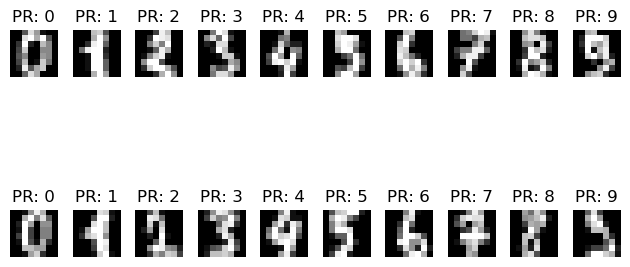

In [14]:
fig, axes = plt.subplots(2, 10)
for i in range(20):
    axes[i//10, i %10].imshow(digits.images[i], cmap='gray')
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"PR: {digits.target[i]}")
    
plt.tight_layout()
plt.show()


## Part (b)  
Split the dataset into training and testing sets

In [15]:
##TODO##
Xtr1, Xtest1, Ytr1, Ytest1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

## Part (c) 
Define a multilayer perceptron (MLP) with two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should produce the output. Use `nn.Sequential` to connect the layers and implement the forward pass.

In [ ]:
class MLP_Class(nn.Module):
    def __init__(self, input_dim, hidden=10, output_dim=10): # output_dim输出的神经元个数，
                                                             # 等于分类类别数（这里是10类数字）
        super().__init__()
        self.model = nn.Sequential( #self.model 和 self.linear只是不同的命名习惯
                                    #当你写 self.xxx = ... 时，你其实是在告诉 Python：
                                    #“请在这个类实例（self）中创建一个名为 xxx 的属性，并把右边的对象存进去。”
            nn.Linear(input_dim, hidden),   # 输入层到隐藏层的线性变换
                                            # 原始特征（input_dim）映射到更抽象的空间（hidden，这里是 10 个神经元）
            nn.ReLU(),                      # 激活函数：数学公式：f(x) = max(0, x)
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, output_dim)  
        )

    def forward(self, x):
        return self.model(x)


'''
特性:单层感知机 (Perceptron),多层感知机 (MLP_Class)
层数:1 层 (Linear),3 层 (Linear)
非线性:仅输出端 (Sigmoid),层与层之间 (ReLU)
能力:只能划直线（线性分类）,可以划曲线（非线性分类）
适用任务:简单的二分类,复杂分类（如图像、非线性分布数据）

# 你的多层代码
self.model = nn.Sequential(层1, 层2, 层3)

def forward(self, x):
    return self.model(x)  # 一键执行所有层

其实单层感知机也可以写成 self.model,甚至可以用 nn.Sequential:
class PerceptronTorch(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        # 虽然只有一层，但也可以用容器包装
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1)
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)
'''

'\n特性:单层感知机 (Perceptron),多层感知机 (MLP_Class)\n层数:1 层 (Linear),3 层 (Linear)\n非线性:仅输出端 (Sigmoid),层与层之间 (ReLU)\n能力:只能划直线（线性分类）,可以划曲线（非线性分类）\n适用任务:简单的二分类,复杂分类（如图像、非线性分布数据）\n\n# 你的多层代码\nself.model = nn.Sequential(层1, 层2, 层3)\n\ndef forward(self, x):\n    return self.model(x)  # 一键执行所有层\n\n其实单层感知机也可以写成 self.model,甚至可以用 nn.Sequential:\nclass PerceptronTorch(nn.Module):\n    def __init__(self, input_dim):\n        super().__init__()\n        # 虽然只有一层，但也可以用容器包装\n        self.model = nn.Sequential(\n            nn.Linear(input_dim, 1)\n            nn.Sigmoid()\n        )\n\n    def forward(self, x):\n        return self.model(x)\n'

Set up the MLP by specifying the input size, number of output classes, and the hidden layer sizes. Then create the model and prepare it for training by choosing an appropriate loss function (CrossEntropyLoss for multi‑class classification) and an optimizer (Adam with a learning rate of 0.01).

In [17]:
input_dim = Xtr1.shape[1]
output_dim = len(torch.unique(torch.tensor(Ytr1))) # output_dim 是输出层的神经元个数，等于类别数（这里是10类数字）
                                                   # len(torch.unique(...)) 是一种非常健壮（Robust）的写法,
                                                   # 它能让你的代码自动适配不同的数据集：
hidden_layer_sizes=10
model1 = MLP_Class(input_dim, hidden_layer_sizes, output_dim)

criterion1 = nn.CrossEntropyLoss() #交叉熵损失函数（Cross Entropy Loss）是多分类问题的标准损失函数。它衡量模型输出的概率分布与实际标签之间的差距。
optimizer1 = optim.Adam(model1.parameters(), lr=0.01) #优化器

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [ ]:
Xtr_t1 = torch.tensor(Xtr1, dtype=torch.float32)
Ytr_t1 = torch.tensor(Ytr1, dtype=torch.long) # CrossEntropyLoss 要求标签是整数类型（LongTensor），而不是浮点数。
Ytest_t1 = torch.tensor(Ytest1, dtype=torch.long)

Xtest_t1 = torch.tensor(Xtest1, dtype=torch.float32)

Identify the epoch at which the validation loss stops decreasing.

Epoch 1/num_epochs, Loss: 2.5186
Epoch 2/num_epochs, Loss: 2.2752
Epoch 3/num_epochs, Loss: 2.1581
Epoch 4/num_epochs, Loss: 2.0259
Epoch 5/num_epochs, Loss: 1.9158
Epoch 6/num_epochs, Loss: 1.7710
Epoch 7/num_epochs, Loss: 1.6284
Epoch 8/num_epochs, Loss: 1.5093
Epoch 9/num_epochs, Loss: 1.3785
Epoch 10/num_epochs, Loss: 1.2498
Epoch 11/num_epochs, Loss: 1.1462
Epoch 12/num_epochs, Loss: 1.0553
Epoch 13/num_epochs, Loss: 0.9714
Epoch 14/num_epochs, Loss: 0.9082
Epoch 15/num_epochs, Loss: 0.8506
Epoch 16/num_epochs, Loss: 0.7950
Epoch 17/num_epochs, Loss: 0.7465
Epoch 18/num_epochs, Loss: 0.7031
Epoch 19/num_epochs, Loss: 0.6661
Epoch 20/num_epochs, Loss: 0.6356
Epoch 21/num_epochs, Loss: 0.6047
Epoch 22/num_epochs, Loss: 0.5693
Epoch 23/num_epochs, Loss: 0.5313
Epoch 24/num_epochs, Loss: 0.4954
Epoch 25/num_epochs, Loss: 0.4663
Epoch 26/num_epochs, Loss: 0.4416
Epoch 27/num_epochs, Loss: 0.4152
Epoch 28/num_epochs, Loss: 0.3836
Epoch 29/num_epochs, Loss: 0.3559
Epoch 30/num_epochs, Lo

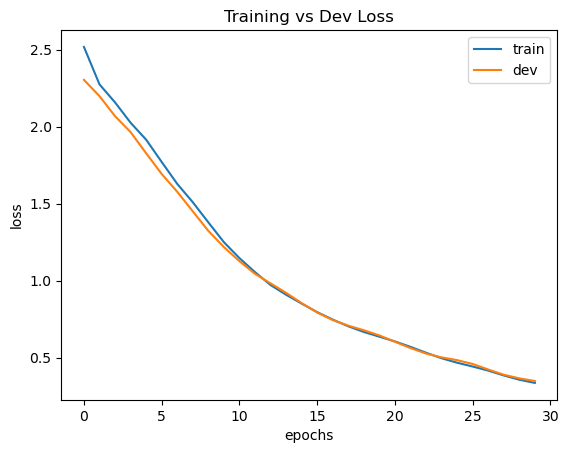

In [20]:
num_epochs = 30
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model1.train()
    optimizer1.zero_grad()

    # forward pass
    outputs = model1(Xtr_t1)
    loss = criterion1(outputs, Ytr_t1)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer1.step()
    print(f"Epoch {epoch+1}/num_epochs, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model1.eval()
    with torch.no_grad():
        dev_out = model1(Xtest_t1)
        dev_loss = criterion1(dev_out, Ytest_t1)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

### Predict on Test Data
Run the model in evaluation mode, compute the output logits for the test set, and convert these logits into class predictions by taking the index of the largest value (the class with the highest score). Then compare these predicted class labels with the true labels to calculate the model’s accuracy.

Accuracy of MLP: 89.72%
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.92      0.79      0.85        28
           2       0.88      0.88      0.88        33
           3       0.91      0.94      0.93        34
           4       0.96      0.98      0.97        46
           5       0.93      0.85      0.89        47
           6       0.92      0.97      0.94        35
           7       0.89      0.97      0.93        34
           8       0.73      0.90      0.81        30
           9       0.86      0.78      0.82        40

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.89       360
weighted avg       0.90      0.90      0.90       360

Confusion Matrix:


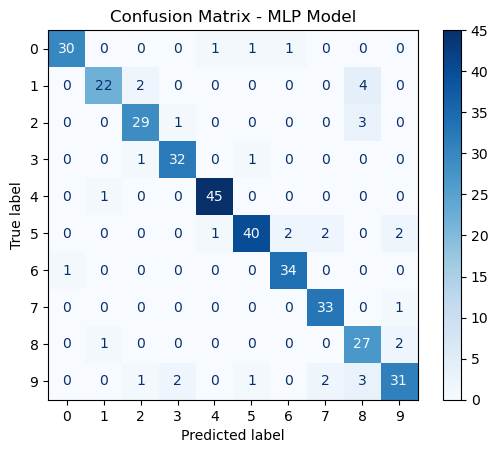

In [27]:
with torch.no_grad():
    logits = model1(Xtest_t1) # 模型输出的 logits 是未经过归一化的原始分数值。
                              # 对于 load_digits（10 分类）任务，每一行数据都会得到 10 个数字。 
                              # 例如，第一行的输出可能是 [1.2, -0.5, 5.8, ...]。
                              # 分值越高，模型认为属于该类别的可能性越大。挑选每行得分最高的位置作为预测的数字标签
    Y_pred1 = torch.argmax(logits, dim=1).numpy() # argmax 会寻找每一行中最大值所在的索引（Index）,
                                                  # 这个索引就是模型预测的数字标签（0~9）。
                                                  # dim=1 表示在“列”的方向上寻找每一行中的最大值，
                                                  # 从张量转成np数组，最后形成一条由每行最大值构成的列向量。
    
##TODO##
accuracy_mlp1 = accuracy_score(Ytest1, Y_pred1) # np.mean(Y_pred1 == Ytest1)
print(f"Accuracy of MLP: {accuracy_mlp1 * 100:.2f}%")

print("Classification Report :")
##TODO##
print(classification_report(Ytest1, Y_pred1))

print("Confusion Matrix:")
##TODO##
cm = confusion_matrix(Ytest1, Y_pred1) # 生成原始混淆矩阵数据
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names) # 创建显示对象
disp.plot(cmap=plt.cm.Blues) # 绘制混淆矩阵，cmap=plt.cm.Blues 是一种颜色映射方案，让矩阵更美观易读
plt.title('Confusion Matrix - MLP Model')
plt.show()

Visualize a sample of images and their predictions for MLP. Check if it is correct.

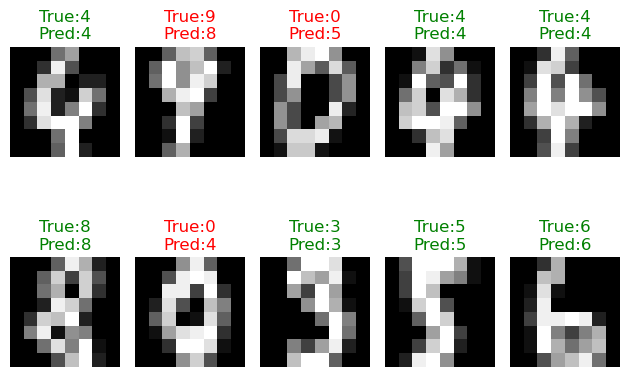

In [31]:
##TODO##
# 1. 随机挑选 10 个测试样本的索引
random_indics = np.random.choice(len(Xtest1), size=10, replace=False) # 不重复地抽取10个索引

plt.Figure(figsize=(15, 5))

for i, idx in enumerate(random_indics):
    # 2. 将 64 维向量重新变形为 8x8 的图像矩阵
    image = Xtest1[idx].reshape(8, 8)
    # 3. 获取对应的真实标签和预测标签
    true_label = Ytest1[idx]
    pred_label = Y_pred1[idx]
    # 4. 绘制子图
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    # 5. 设置标题：如果预测正确用绿色，错误用红色
    if true_label == pred_label:
        color = 'green'
    else:
        color = 'red'
    plt.title(f"True:{true_label}\nPred:{pred_label}", color = color)
    plt.axis('off') # 隐藏坐标轴

plt.tight_layout()
plt.show()


## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

# 2.2. Regression Using a Multilayer Perceptron in PyTorch
In this section, you will build and train a Multilayer Perceptron (MLP) in PyTorch to perform a regression task on the `load_diabetes` dataset. The goal is to predict a continuous target value representing diabetes progression, using 10 numerical input features.

In this task, you will:  
(a) Load the dataset using `load_diabetes` from `sklearn.datasets`.  
(b) Split the data into training and test sets.  
(c) Build and train a regression MLP in PyTorch using fully connected layers and an appropriate activation function (e.g., ReLU).  
(d) Evaluate the model’s performance on the test set using regression metrics such as Mean Squared Error (MSE) and R² score.  
(e) Experiment with different hyperparameters (hidden layer sizes, learning rate, number of epochs) to improve performance.  
(f) Plot predicted vs. actual values to visualise how well the model fits the data.

## Part (a)
Load the load_diabetes from sklearn.datasets
Check the X and y of your data
Take a look at the data in `X2` and the target labels in `Y2`. Find their shapes using `.shape`. 
- How many data points are there in `X2`?
- How many features does each data point have?
- Does the data require scaling or normalising before training a neural network model?

In [22]:
#TODO# Load dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

[X2,Y2]= [diabetes.data, diabetes.target]
X2.shape #(442, 10)
Y2.shape #(442,)
print(X2) # 10 个特征，都是连续数值，且没有明显的分类边界
print(Y2) # 目标值是一个连续数值，范围大约在 25 到 346 之间，且没有明显的分界线。

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

## Part (b) 
Split the data into training and testing sets

In [23]:
##TODO## Split dataset
Xtr2, Xtest2, Ytr2, Ytest2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [ ]:
scaler_X = StandardScaler() # 均值为0，标准差为1（标准化）:（样本-均值）/标准差；
                            # 处理后的数据呈正态分布，大部分数值会落在[-3, 3]之间。
Xtr2 = scaler_X.fit_transform(Xtr2) # Fit（拟合）：计算训练集 Xtr2 的平均值和标准差。
                                    # Transform（转换）：应用公式进行缩放。
Xtest2 = scaler_X.transform(Xtest2) # 注意：测试集必须使用训练集的均值和标准差进行缩放，
                                    # 不能重新拟合，否则会泄露测试集信息，导致评估结果不可靠。

scaler_Y = StandardScaler()
Ytr2 = scaler_Y.fit_transform(Ytr2.reshape(-1,1)) # reshape(-1,1)是为了把一维数组 Ytr2 转换成二维数组（列向量）,
                                                  # 以满足 StandardScaler 的输入要求。
Ytest2 = scaler_Y.transform(Ytest2.reshape(-1,1))
'''
4. 为什么回归分析必须对 Y 进行标准化？
对于分类任务（如之前的数字识别），我们从不对标签进行标准化。
但在回归任务中，标准化 Y 非常重要：
收敛速度：如果 $Y$ 是房价（几十万到几百万），而 X 经过了缩放，模型权重的更新会非常剧烈，导致训练难以收敛。
损失函数：回归常用的 MSELoss(均方误差)对巨大的数值非常敏感。将 Y 缩放到 0 附近可以使训练更平稳。
'''
Ytr2.shape #(353, 1)
# rshape(-1,1)是为了把一维数组 Ytr2 转换成二维数组（列向量），以满足 StandardScaler 的输入要求。
    # , 1)：明确告诉 PyTorch，我希望第二维（列）的大小固定为 1。
    # (-1：让 PyTorch 自动计算第一维（行）的大小，以适应原始数据的总元素数量。

array([[-0.12490555],
       [-0.04793437],
       [ 1.61977453],
       [-0.36864762],
       [-1.21533059],
       [-1.13835941],
       [ 1.63260306],
       [ 1.58128894],
       [ 0.17015064],
       [-0.81764616],
       [-1.0485597 ],
       [ 0.31126447],
       [-0.84330322],
       [ 1.49148923],
       [-0.67653233],
       [ 0.55500654],
       [-0.72784645],
       [-1.29230177],
       [-1.06138823],
       [ 1.38886099],
       [-1.3051303 ],
       [-0.6637038 ],
       [ 0.15732211],
       [ 0.4523783 ],
       [ 0.24712182],
       [ 0.85006273],
       [ 0.67046331],
       [-0.72784645],
       [-1.20250206],
       [-1.18967353],
       [ 1.13229039],
       [-0.41996173],
       [-0.33016203],
       [-0.63804674],
       [ 1.42734658],
       [-0.27884791],
       [ 1.65826012],
       [ 0.25995035],
       [-0.3173335 ],
       [ 1.32471834],
       [-0.21470526],
       [-1.16401647],
       [-0.77916057],
       [ 1.00400509],
       [ 0.69612037],
       [ 1

## Part (c)
Define a multilayer perceptron (MLP) for a regression task using two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should output a single continuous value. Use `nn.Sequential` to connect the layers and implement the forward pass. The final layer should output a single value for regression.

In [28]:
class MLP_Reg(nn.Module):
    def __init__(self, input_dim, hidden=10):
        super().__init__()
        self.model = nn.Sequential(
        ###TODO## Create the MLP Regressor model
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, 1) # 回归问题的输出层通常只有一个神经元，
                                 # 直接输出一个连续数值（如房价预测），而不是分类标签
        )

    def forward(self, x):
        return self.model(x)


Set up the MLP by specifying the input size, the hidden layer sizes, and an output size of 1 for continuous regression. Then create the model and prepare it for training by selecting a suitable loss function for regression (such as `nn.MSELoss()`)

In [29]:
input_dim = Xtr2.shape[1]
hidden_layer_sizes=10
model2 = MLP_Reg(input_dim, hidden_layer_sizes)
criterion2 = nn.MSELoss() # 均方误差损失函数（Mean Squared Error Loss）是回归问题的标准损失函数。
                          # 它衡量模型预测值与实际连续标签之间的差距。
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [ ]:
Xtr_t2 = torch.tensor(Xtr2, dtype=torch.float32)
Ytr_t2 = torch.tensor(Ytr2, dtype=torch.float32).view(-1, 1)
Ytest_t2 = torch.tensor(Ytest2, dtype=torch.float32).view(-1, 1) #.view()用法与reshape()相同
'''
1. 匹配损失函数的矩阵运算回归任务通常使用 nn.MSELoss()(均方误差)。
    为了计算预测值与真实值之间的差平方,PyTorch 要求两个张量的维度(Rank)必须完全一致。
    模型的输出：线性层 nn.Linear(hidden, 1) 输出的形状通常是 [Batch_size, 1]（二维）。
    原始的标签：如果不使用 .view,你的 Y 可能只是一个一维列表 [Batch_size]（一维）。
    后果:如果维度不匹配,PyTorch 可能会触发广播机制(Broadcasting),
        导致计算出错误的损失矩阵（例如变成 [Batch_size, Batch_size]），或者直接报错。
'''
Xtest_t2 = torch.tensor(Xtest2, dtype=torch.float32)
Ytr_t2.shape

torch.Size([353, 1])

Identify the epoch at which the validation loss stops decreasing.

Epoch 1/30, Loss: 0.9843
Epoch 2/30, Loss: 0.9403
Epoch 3/30, Loss: 0.9044
Epoch 4/30, Loss: 0.8736
Epoch 5/30, Loss: 0.8460
Epoch 6/30, Loss: 0.8191
Epoch 7/30, Loss: 0.7909
Epoch 8/30, Loss: 0.7600
Epoch 9/30, Loss: 0.7277
Epoch 10/30, Loss: 0.6954
Epoch 11/30, Loss: 0.6648
Epoch 12/30, Loss: 0.6376
Epoch 13/30, Loss: 0.6146
Epoch 14/30, Loss: 0.5946
Epoch 15/30, Loss: 0.5758
Epoch 16/30, Loss: 0.5577
Epoch 17/30, Loss: 0.5415
Epoch 18/30, Loss: 0.5299
Epoch 19/30, Loss: 0.5240
Epoch 20/30, Loss: 0.5224
Epoch 21/30, Loss: 0.5221
Epoch 22/30, Loss: 0.5204
Epoch 23/30, Loss: 0.5153
Epoch 24/30, Loss: 0.5065
Epoch 25/30, Loss: 0.4962
Epoch 26/30, Loss: 0.4867
Epoch 27/30, Loss: 0.4795
Epoch 28/30, Loss: 0.4744
Epoch 29/30, Loss: 0.4711
Epoch 30/30, Loss: 0.4681


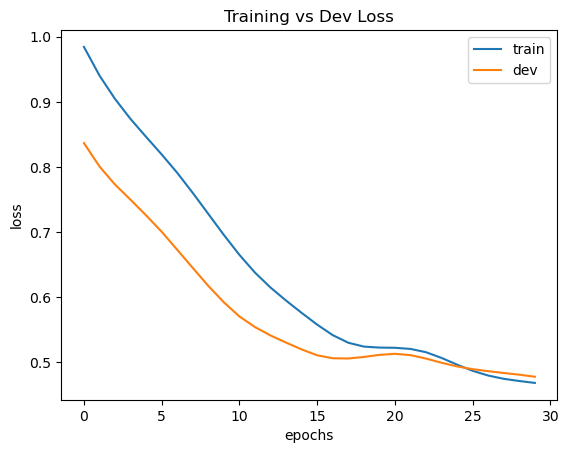

In [34]:
num_epochs=30
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model2.train()
    optimizer2.zero_grad()

    # forward pass
    outputs = model2(Xtr_t2)
    loss = criterion2(outputs, Ytr_t2)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer2.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model2.eval()
    with torch.no_grad():
        dev_out = model2(Xtest_t2)
        dev_loss = criterion2(dev_out, Ytest_t2)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()
plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

## Part (d)
Make predictions on the test set (`Xtest2`).
Evaluate the model using appropriate metrics from `sklearn.metrics`.

In [35]:
with torch.no_grad():
    y_pred2 = model2(Xtest_t2).numpy().flatten()

# TODO: Evaluate regression performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Ytest2, y_pred2)
r2 = r2_score(Ytest2, y_pred2)
print(f"MSE of MLP: {mse:.4f}")
print(f"R² Score of MLP: {r2:.4f}")

MSE of MLP: 0.4776
R² Score of MLP: 0.4522


## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

## Part (f)
Plot the predicted vs actual values
After training the `MLP_Reg` and predicting the outputs for `Xtest2`, create a scatter plot to compare the predicted values (`y_pred2`) against the actual values (`Ytest2`).

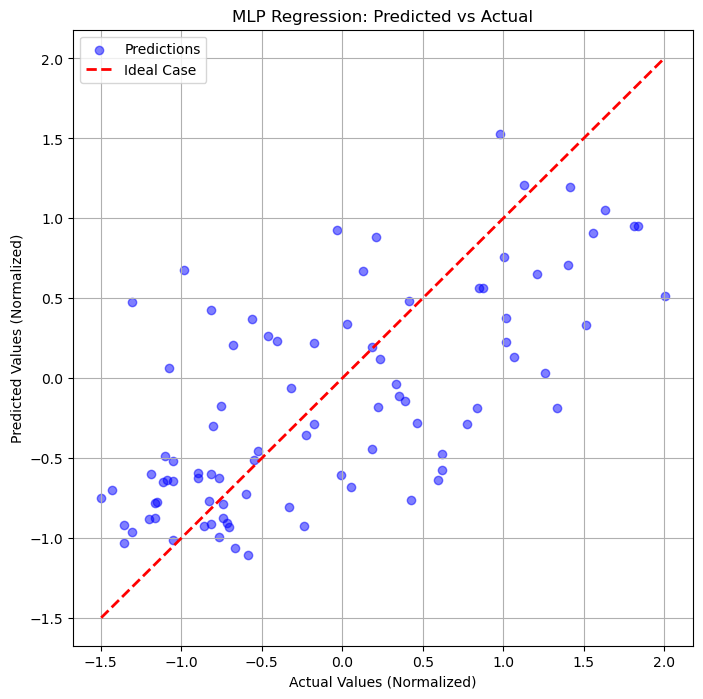

In [ ]:
# TODO# plot the predicted vs actual values

# 1. 确保预测结果和真实值都是 NumPy 数组，且形状一致
# 如果 y_pred2 还在 GPU 上或带有梯度，需要使用 .detach().cpu().numpy()
# 如果 Ytest2 经过了 .view(-1, 1)，建议用 .flatten() 转为一维
plt.figure(figsize=(8, 8))
# 2. 绘制散点图
plt.scatter(Ytest2.flatten(), y_pred2.flatten(), alpha=0.5, color='blue', label='Predictions')
# 3. 绘制理想情况下的参考线（即 y = x）
max_val = max(Ytest2.max(), y_pred2.max())
min_val = min(Ytest2.min(), y_pred2.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Ideal Case')
        # plt.plot(x_list, y_list)
# 4. 美化图表
plt.xlabel('Actual Values (Normalized)')
plt.ylabel('Predicted Values (Normalized)')
plt.title('MLP Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()